# Deep Learning with TensorFlow

Classical machine learning relies on using statistics to determine relationships between features and labels, and can be very effective for creating predictive models. However, a massive growth in the availability of data coupled with advances in the computing technology required to process it has led to the emergence of new machine learning techniques that mimic the way the brain processes information in a structure called an artificial neural network.

TensorFlow is a framework for creating machine learning models, including deep neural networks (DNNs). In this example, we'll use Tensorflow to create a simple neural network that classifies penguins into species based on the length and depth of their culmen (bill), their flipper length, and their body mass.

> **Citation**: The penguins dataset used in the this exercise is a subset of data collected and made available by [Dr. Kristen
Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php)
and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a
member of the [Long Term Ecological Research
Network](https://lternet.edu/).

## Explore the dataset

Before we start using TensorFlow to create a model, let's load the data we need from the Palmer Islands penguins dataset, which contains observations of three different species of penguin.

> **Note**: In reality, you can solve the penguin classification problem easily using classical machine learning techniques without the need for a deep learning model; but it's a useful, easy to understand dataset with which to demonstrate the principles of neural networks in this notebook.

# TensorFlowによるディープラーニング

古典的な機械学習は、統計学を用いて特徴量とラベルの関係を決定するもので、予測モデルの作成に非常に効果的である。しかし、データの利用可能性の大幅な増加と、それを処理するために必要なコンピューティング技術の進歩により、人工ニューラルネットワークと呼ばれる構造で脳の情報処理方法を模倣する新しい機械学習技術が出現しました。

TensorFlowは、ディープニューラルネットワーク（DNN）を含む、機械学習モデルを作成するためのフレームワークである。この例では、Tensorflowを使用して、稈（嘴）の長さと深さ、フリッパーの長さ、および体格に基づいてペンギンを種に分類する簡単なニューラルネットワークを作成します。

> (注1) **引用**: この演習で使用したペンギンのデータセットは、[Dr. Kristen]によって収集され利用可能になったデータのサブセットです。
ゴーマン】(https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php)
と、【Palmer Station, Antarctica LTER】(https://pal.lternet.edu/)の2つがある。
長期生態学研究」メンバー
ネットワーク](https://lternet.edu/)。

## データセットを調べる

TensorFlowを使ってモデルを作成する前に、3種類のペンギンの観測データを含むPalmer Islands penguinsデータセットから必要なデータをロードしてみましょう。

> **注**です。しかし、このノートブックでニューラルネットワークの原理を実証するための、便利でわかりやすいデータセットです。

www.DeepL.com/Translator（無料版）で翻訳しました。

In [14]:
import pandas as pd

# load the training dataset (excluding rows with null values)
penguins = pd.read_csv('data/penguins.csv').dropna()

# Deep Learning models work best when features are on similar scales
# In a real solution, we'd implement some custom normalization for each feature, but to keep things simple
# we'll just rescale the FlipperLength and BodyMass so they're on a similar scale to the bill measurements
# ディープラーニングのモデルは、特徴が同じようなスケールであるときに最もよく機能する
# 実際のソリューションでは、各機能ごとにカスタマイズされた正規化を実装することになりますが、物事をシンプルに考えるために
# FlipperLengthとBodyMassを再スケーリングして、法案の測定値と同様のスケールにします。
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

# データセットが小さすぎてディープラーニングに使えない
# そこで、オーバーサンプリングしてサイズを大きくする
for i in range(1,3):
    penguins = penguins.append(penguins)

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample

/var/folders/4d/ygqjdt3d7cq593qgrbs9wbnw0000gn/T/ipykernel_23522/1646010116.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  penguins = penguins.append(penguins)
/var/folders/4d/ygqjdt3d7cq593qgrbs9wbnw0000gn/T/ipykernel_23522/1646010116.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  penguins = penguins.append(penguins)


,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
137,40.2,20.1,20.0,39.75,0
317,46.2,17.5,18.7,36.50,2
98,33.1,16.1,17.8,29.00,0
300,46.7,17.9,19.5,33.00,2
135,41.1,17.5,19.0,39.00,0
108,38.1,17.0,18.1,31.75,0
278,51.3,19.2,19.3,36.50,2
12,41.1,17.6,18.2,32.00,0
158,45.4,14.6,21.1,48.00,1
233,52.5,15.6,22.1,54.50,1


The **Species** column is the label our model will predict. Each label value represents a class of penguin species, encoded as 0, 1, or 2. The following code shows the actual species to which these class labels corrrespond.

Species**の列は、モデルが予測するラベルです。各ラベル値はペンギンの種のクラスを表し、0、1、または2として符号化されます。以下のコードは、これらのクラスラベルが対応する実際の種を表しています。

In [15]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 45.8 14.6 21.0 42.0 1 ] Gentoo
[ 52.8 20.0 20.5 45.5 2 ] Chinstrap
[ 50.7 15.0 22.3 55.5 1 ] Gentoo
[ 45.5 13.9 21.0 42.0 1 ] Gentoo
[ 35.7 17.0 18.9 33.5 0 ] Adelie
[ 46.9 16.6 19.2 27.0 2 ] Chinstrap
[ 36.8 18.5 19.3 35.0 0 ] Adelie
[ 50.9 17.9 19.6 36.75 2 ] Chinstrap
[ 38.1 17.0 18.1 31.75 0 ] Adelie
[ 51.3 14.2 21.8 53.0 1 ] Gentoo


As is common in a supervised learning problem, we'll split the dataset into a set of records with which to train the model, and a smaller set with which to validate the trained model.

教師あり学習でよくあることですが、データセットを、モデルを学習するためのレコードセットと、学習したモデルを検証するための小さなセットに分けます。

In [30]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'
   
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                    penguins[label].values,
                                                    test_size=0.30,
                                                    random_state=0)

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(x_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')

Training Set: 957, Test Set: 411 

Sample of features and labels:
[51.1 16.5 22.5 52.5] 1 (Gentoo)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.5 16.2 22.9 58. ] 1 (Gentoo)
[39.3 20.6 19.  36.5] 0 (Adelie)
[42.5 20.7 19.7 45. ] 0 (Adelie)
[50.  15.3 22.  55.5] 1 (Gentoo)
[50.2  18.7  19.8  37.75] 2 (Chinstrap)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.1  14.5  21.2  46.25] 1 (Gentoo)
[43.2 16.6 18.7 29. ] 2 (Chinstrap)
[38.8  17.6  19.1  32.75] 0 (Adelie)
[37.8 17.1 18.6 33. ] 0 (Adelie)
[45.8 14.2 21.9 47. ] 1 (Gentoo)
[43.8 13.9 20.8 43. ] 1 (Gentoo)
[36.  17.1 18.7 37. ] 0 (Adelie)
[43.3 13.4 20.9 44. ] 1 (Gentoo)
[36.  18.5 18.6 31. ] 0 (Adelie)
[41.1  19.   18.2  34.25] 0 (Adelie)
[33.1 16.1 17.8 29. ] 0 (Adelie)
[40.9 13.7 21.4 46.5] 1 (Gentoo)
[45.2 17.8 19.8 39.5] 2 (Chinstrap)
[48.4 14.6 21.3 58.5] 1 (Gentoo)
[43.6 13.9 21.7 49. ] 1 (Gentoo)
[38.5  17.9  19.   33.25] 0 (Adelie)


The *features* are the measurements for each penguin observation, and the *label* is a numeric value that indicates the species of penguin that the observation represents (Adelie, Gentoo, or Chinstrap).

## Install and import TensorFlow libraries

Since we plan to use TensorFlow to create our penguin classifier, we'll need to run the following two cells to install and import the libraries we intend to use.

> **Note** *Keras* is an abstraction layer over the base TensorFlow API. In most common machine learning scenarios, you can use Keras to simplify your code.

features*は各ペンギン観測の測定値で、*label*はその観測が表すペンギンの種（Adelie、Gentoo、またはChinstrap）を示す数値である。

## TensorFlow ライブラリのインストールとインポート

TensorFlowを使用してペンギン分類器を作成する予定なので、以下の2つのセルを実行して、使用する予定のライブラリをインストールし、インポートする必要があります。

> 注** **Keras*は、TensorFlowの基本APIを抽象化したレイヤーです。ほとんどの一般的な機械学習シナリオでは、Kerasを使用してコードを簡素化することができます。

In [17]:
!pip install --upgrade tensorflow

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.11.0
TensorFlow version: 2.11.0


## Prepare the data for TensorFlow

We've already loaded our data and split it into training and validation datasets. However, we need to do some further data preparation so that our data will work correctly with TensorFlow. Specifically, we need to set the data type of our features to 32-bit floating point numbers, and specify that the labels represent categorical classes rather than numeric values.

## TensorFlow用のデータを準備する。

すでにデータをロードし、訓練用と検証用のデータセットに分割しました。しかし、TensorFlowでデータが正しく動作するように、さらにいくつかのデータ準備をする必要があります。具体的には、特徴量のデータ型を32ビット浮動小数点数に設定し、ラベルが数値ではなくカテゴリークラスを表すように指定する必要があります。

In [31]:
print(x_train, '\n\n\n', x_test, '\n\n\n', y_train,
      '\n\n\n', y_test)  
# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print(x_train, '\n\n\n', x_test, '\n\n\n', y_train, '\n\n\n', y_test)

print('Ready...')

[[51.1 16.5 22.5 52.5]
 [50.7 19.7 20.3 40.5]
 [49.5 16.2 22.9 58. ]
 ...
 [48.7 15.7 20.8 53.5]
 [46.2 14.4 21.4 46.5]
 [39.1 18.7 18.1 37.5]] 


 [[34.6  21.1  19.8  44.  ]
 [37.6  19.1  19.4  37.5 ]
 [47.3  13.8  21.6  47.25]
 ...
 [48.5  15.   21.9  48.5 ]
 [38.6  21.2  19.1  38.  ]
 [41.4  18.5  20.2  38.75]] 


 [1 2 1 0 0 1 2 2 1 2 0 0 1 1 0 1 0 0 0 1 2 1 1 0 1 2 1 1 2 0 2 0 1 1 2 0 0
 1 0 2 2 0 1 2 0 1 2 2 0 1 0 0 0 2 0 1 0 1 0 0 2 0 2 1 1 0 0 0 1 2 0 1 1 1
 0 0 1 0 2 1 1 0 0 2 1 1 1 0 0 0 1 0 1 1 1 0 1 2 2 1 0 1 0 0 2 0 1 0 0 2 1
 1 1 2 1 0 0 0 1 0 1 0 2 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 2 2 0 1 1 1 1 0
 1 0 2 0 1 0 2 1 0 1 0 2 0 1 2 0 0 0 1 1 2 0 1 1 0 1 1 0 2 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 2 2 1 0 1 1 2 1 1 0 2 0 1 1 1 1 0 0 1 0 0 2
 0 0 1 2 0 1 0 1 0 2 1 0 0 0 1 0 2 0 0 1 0 1 0 0 0 2 1 2 2 1 1 2 1 2 0 1 0
 2 1 2 2 0 1 0 2 2 0 1 2 0 0 0 0 0 1 0 2 1 0 2 2 0 1 1 0 0 1 1 1 2 0 0 1 1
 0 1 1 0 2 0 0 0 0 1 2 1 2 1 1 0 0 2 2 1 2 2 1 1 2 1 1 0 0 0 2 0 0 1 1 0 0
 2 1 

## Define a neural network

Now we're ready to define our neural network. In this case, we'll create a network that consists of 3 fully-connected layers:
* An input layer that receives an input value for each feature (in this case, the four penguin measurements) and applies a *ReLU* activation function.
* A hidden layer that receives ten inputs and applies a *ReLU* activation function.
* An output layer that uses a *SoftMax* activation function to generate an output for each penguin species (which represent the classification probabilities for each of the three possible penguin species). Softmax functions produce a vector with probability values that sum to 1.

## ニューラルネットワークを定義する

これで、ニューラルネットワークを定義する準備が整いました。今回は、3つの完全連結層で構成されるネットワークを作成します。
* 各特徴（この場合、4つのペンギンの計測値）の入力値を受け取り、*ReLU*活性化関数を適用する入力層。
* 10個の入力を受け取り、*ReLU*活性化関数を適用する隠れ層。
* 出力層では、*SoftMax*活性化関数を使用して、各ペンギン種の出力を生成します（これは、3つの可能なペンギン種のそれぞれの分類確率を表します）。ソフトマックス関数は、確率値の合計が1になるベクトルを生成します。

In [20]:
# Define a classifier network
hl = 10 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(hl, input_dim=len(features), activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(len(penguin_classes), input_dim=hl, activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


## Train the model

To train the model, we need to repeatedly feed the training values forward through the network, use a loss function to calculate the loss, use an optimizer to backpropagate the weight and bias value adjustments, and validate the model using the test data we withheld.

To do this, we'll apply an Adam optimizer to a categorical cross-entropy loss function iteratively over 50 epochs.

## モデルの訓練

モデルを学習させるためには、学習値をネットワークに繰り返し送り込み、損失関数を使って損失を計算し、オプティマイザを使って重みとバイアス値の調整をバックプロパゲートし、保留したテストデータを使ってモデルの検証を行う必要があります。

そのために、Adamオプティマイザをカテゴリ別クロスエントロピー損失関数に適用し、50エポックかけて繰り返し実行します。

In [32]:
#hyper-parameters for optimizer
learning_rate = 0.001
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/50
96/96 [==============================] - 1s 4ms/step - loss: 0.0250 - accuracy: 0.9906 - val_loss: 0.0196 - val_accuracy: 0.9951
Epoch 2/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.0191 - val_accuracy: 0.9951
Epoch 3/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9833 - val_loss: 0.0525 - val_accuracy: 0.9781
Epoch 4/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9896 - val_loss: 0.0187 - val_accuracy: 0.9951
Epoch 5/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9916 - val_loss: 0.0399 - val_accuracy: 0.9830
Epoch 6/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9927 - val_loss: 0.0279 - val_accuracy: 0.9878
Epoch 7/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9843 - val_loss: 0.0209 - val_accuracy: 0.9951
Epoch 8/50
96/96 [==

While the training process is running, let's try to understand what's happening:

1. In each *epoch*, the full set of training data is passed forward through the network. There are four features for each observation, and four corresponding nodes in the input layer - so the features for each observation are passed as a vector of four values to that layer. However, for efficiency, the feature vectors are grouped into batches; so actually a matrix of multiple feature vectors is fed in each time.
2. The matrix of feature values is processed by a function that performs a weighted sum using initialized weights and bias values. The result of this function is then processed by the activation function for the input layer to constrain the values passed to the nodes in the next layer.
3. The weighted sum and activation functions are repeated in each layer. Note that the functions operate on vectors and matrices rather than individual scalar values. In other words, the forward pass is essentially a series of nested linear algebra functions. This is the reason data scientists prefer to use computers with graphical processing units (GPUs), since these are optimized for matrix and vector calculations.
4. In the final layer of the network, the output vectors contain a probability value for each possible class (in this case, classes 0, 1, and 2). This vector is processed by a *loss function* to determine how far the values calculated by the network are from the actual values - so for example, suppose the output for a Gentoo penguin (class 1) observation is \[0.3, 0.4, 0.3\]. The correct prediction should be \[0.0, 1.0, 0.0\], so the variance between the predicted and actual values (how far away the each predicted value is from what it should be) is \[0.3, 0.6, 0.3\]. This variance is aggregated for each batch and maintained as a running aggregate to calculate the overall level of error (*loss*) incurred by the training data for the epoch. The accuracy (proportion of correct predictions based on the highest probability value in the output vector) for the training data is also calculated.
5. At the end of each epoch, the validation data is passed through the network, and its loss and accuracy are also calculated. It's important to do this because it enables us to compare the performance of the model using data on which it was not trained, helping us determine if it will generalize well for new data or if it's *overfitted* to the training data.
6. After all the data has been passed forward through the network, the output of the loss function for the *training* data (but <u>not</u> the *validation* data) is passed to the opimizer. The precise details of how the optimizer processes the loss vary depending on the specific optimization algorithm being used; but fundamentally you can think of the entire network, from the input layer to the loss function as being one big nested (*composite*) function. The optimizer applies some differential calculus to calculate *partial derivatives* for the function with respect to each weight and bias value that was used in the network. It's possible to do this efficiently for a nested function due to something called the *chain rule*, which enables you to determine the derivative of a composite function from the derivatives of its inner function and outer functions. You don't really need to worry about the details of the math here (the optimizer does it for you), but the end result is that the partial derivatives tell us about the slope (or *gradient*) of the loss function with respect to each weight and bias value - in other words, we can determine whether to increase or decrease the weight and bias values in order to decrease the loss.
7. Having determined in which direction to adjust the weights and biases, the optimizer uses the *learning rate* to determine by how much to adjust them; and then works backwards through the network in a process called *backpropagation* to assign new values to the weights and biases in each layer.
8. Now the next epoch repeats the whole training, validation, and backpropagation process starting with the revised weights and biases from the previous epoch - which hopefully will result in a lower level of loss.
9. The process continues like this for 50 epochs.

## Review training and validation loss

After training is complete, we can examine the loss metrics we recorded while training and validating the model. We're really looking for two things:
* The loss should reduce with each epoch, showing that the model is learning the right weights and biases to predict the correct labels.
* The training loss and validation loss should follow a similar trend, showing that the model is not overfitting to the training data.

Let's plot the loss metrics and see:

トレーニングプロセスが実行されている間、何が起こっているのかを理解するようにしましょう。

1. 1.各エポックにおいて、訓練データのフルセットがネットワークを通して前方に渡される。各観測には4つの特徴があり、入力層には4つの対応するノードがあります。したがって、各観測の特徴は4つの値のベクトルとしてその層に渡されます。しかし、効率化のため、特徴ベクトルはバッチにまとめられ、実際には複数の特徴ベクトルの行列が毎回入力される。
2. 特徴量の行列は、初期化された重みとバイアス値を用いて重み付き和を行う関数で処理される。この関数の結果は、入力層の活性化関数で処理され、次の層のノードに渡される値を制約する。
3. 加重和関数と活性化関数は、各層で繰り返される。なお、これらの関数は、個々のスカラー値ではなく、ベクトルや行列を操作する。つまり、フォワードパスは、基本的に一連のネストした線形代数関数である。データサイエンティストがGPU（グラフィカル・プロセッシング・ユニット）を搭載したコンピュータを好んで使用するのは、行列やベクトルの計算に最適化されているためです。
4. ネットワークの最終層では、出力ベクトルに各クラス（この場合、クラス0、1、2）の確率値が含まれます。このベクトルは、ネットワークが計算した値が実際の値からどの程度離れているかを判断するための*損失関数*で処理されます。例えば、ジェンツーペンギン（クラス1）の観察結果の出力が、˶[0.3, 0.4, 0.3] だと仮定します。正しい予測値は[0.0, 1.0, 0.0]なので、予測値と実際の値の間の分散（各予測値があるべき値からどれだけ離れているか）は[0.3, 0.6, 0.3] です。この分散をバッチごとに集計し、実行集計として保持することで、そのエポックの学習データで発生したエラー（*損失*）の全体レベルを算出します。また、学習データの精度（出力ベクトルの中で最も高い確率値に基づく正しい予測の割合）も算出される。
5. 5.各エポックの終了時に、検証データをネットワークに通し、その損失と精度も計算する。これは、学習していないデータを使ってモデルの性能を比較することができるため、新しいデータに対してうまく一般化できるかどうか、あるいは学習データにオーバーフィットしていないかどうかを判断するのに役立つからです。
6. すべてのデータがネットワークを通して転送された後、*トレーニング*データ（ただし、<u>検証*データではない）に対する損失関数の出力がオプティマイザに渡されます。オプティマイザーが損失を処理する方法の正確な詳細は、使用する特定の最適化アルゴリズムによって異なりますが、基本的には、入力層から損失関数まで、ネットワーク全体が1つの大きな入れ子（*複合*）関数であると考えることができます。オプティマイザは微分積分を適用して、ネットワークで使用された各重みとバイアス値に関して、関数の*偏導関数*を計算します。これは、複合関数の導関数を、その内部関数と外部関数の導関数から求めることができる*チェーンルール*と呼ばれるもので、入れ子の関数に対して効率的にこれを行うことが可能である。偏導関数は、各重みとバイアス値に対する損失関数の傾き（または*勾配*）を示すもので、言い換えれば、損失を減らすために重みとバイアスの値を増やすか減らすかを決定することができるのです。
7. 7.重みとバイアスを調整する方向を決定したオプティマイザーは、*学習率*を使用して、どの程度調整するかを決定します。そして、*バックプロパゲーション*というプロセスでネットワークを逆行し、各層で重みとバイアスに新しい値を割り当てます。
8. 次のエポックでは、前のエポックで修正した重みとバイアスを用いて、トレーニング、検証、バックプロパゲーションのプロセスを繰り返します - うまくいけば、損失のレベルが下がることになります。
9. このようなプロセスを50エポック続けます。

## トレーニングと検証の損失を見直す

トレーニングが完了したら、モデルのトレーニングや検証中に記録した損失メトリクスを調べます。ここでは、2つのことを確認します。
* モデルが正しいラベルを予測するために正しい重みとバイアスを学習していることを示す、エポックごとに損失が減少していること。
* 訓練損失と検証損失は同じような傾向をたどるはずで、モデルが訓練データにオーバーフィットしていないことを示しています。

損失メトリクスをプロットして見てみましょう。

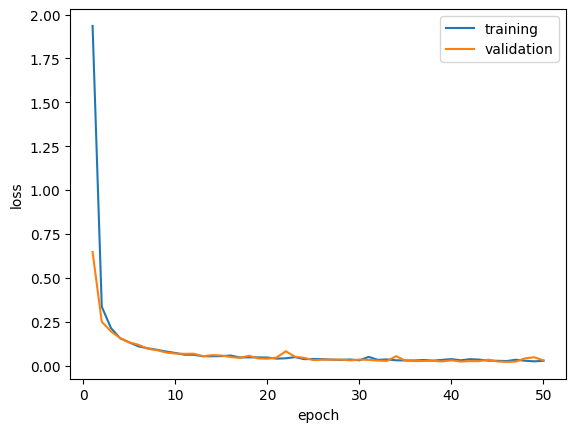

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

## View the learned weights and biases

The trained model consists of the final weights and biases that were determined by the optimizer during training. Based on our network model we should expect the following values for each layer:
* Layer 1: There are four input values going to ten output nodes, so there should be 4 x 10 weights and 10 bias values.
* Layer 2: There are ten input values going to ten output nodes, so there should be 10 x 10 weights and 10 bias values.
* Layer 3: There are ten input values going to three output nodes, so there should be 10 x 3 weights and 3 bias values.

## 学習した重みとバイアスを表示する

学習済みモデルは、学習中にオプティマイザによって決定された最終的な重みとバイアスで構成されます。今回のネットワークモデルから、各レイヤーには以下のような値が想定されます。
* レイヤー1：10個の出力ノードに4個の入力値があるので、4×10個の重みと10個のバイアスがあるはずです。
* レイヤー2: 10個の出力ノードに10個の入力値があるので、10×10個の重みと10個のバイアス値があるはずです。
* レイヤー3: 10個の入力値が3個の出力ノードに向かうので、10×3個の重みと3個のバイアス値があるはずです。

In [23]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[ 0.05049491 -0.05899882  0.06276881  0.6519708  -0.45320448  0.27733374
   0.02723812 -0.3270281  -0.18399459 -0.37275818]
 [-0.18133748  0.03613132  0.20462528  0.48935845  0.5390487   0.20575641
   0.10706386  0.02056044  0.44868994  0.5883888 ]
 [ 0.5465909   0.5621412  -0.51079506 -0.5440968   0.37457106 -0.4389008
   0.3965646  -0.07125342 -0.33000708  0.27269992]
 [-0.4469949  -0.46579558  0.6212493  -0.4797316   0.3508489   0.533458
   0.12151081 -0.1618168  -0.10041118  0.17775875]] 
Biases:
 [ 0.          0.         -0.05006569 -0.03405784  0.00057023 -0.02776507
  0.03686466  0.          0.          0.02659446]
------------
Weights:
 [[ 0.2191925  -0.46987927 -0.23023078 -0.36027217 -0.5471262  -0.09027693
  -0.01661175  0.1871674  -0.20165634  0.11419618]
 [-0.53839344 -0.38815647  0.06986678 -0.3622447   0.44983423 -0.1666775
  -0.45420134  0.01035321 -0.33632493  0.06204593]
 [ 0.18180029 -0.33963686 -0.22052959  0.18843107  0.00307208  0.17772305


## Evaluate model performance

So, is the model any good? The raw accuracy reported from the validation data would seem to indicate that it predicts pretty well; but it's typically useful to dig a little deeper and compare the predictions for each possible class. A common way to visualize the performance of a classification model is to create a *confusion matrix* that shows a crosstab of correct and incorrect predictions for each class.

## モデルの性能を評価する

では、このモデルは良いものなのでしょうか？検証データから報告された生の精度は、このモデルがかなりよく予測していることを示しているように思えます。しかし、通常はもう少し掘り下げて、可能性のある各クラスの予測値を比較することが有用です。分類モデルの性能を可視化する一般的な方法は、各クラスの予測値の正誤をクロス集計した*混乱マトリックス*を作成することです。

13/13 [==============================] - 0s 1ms/step


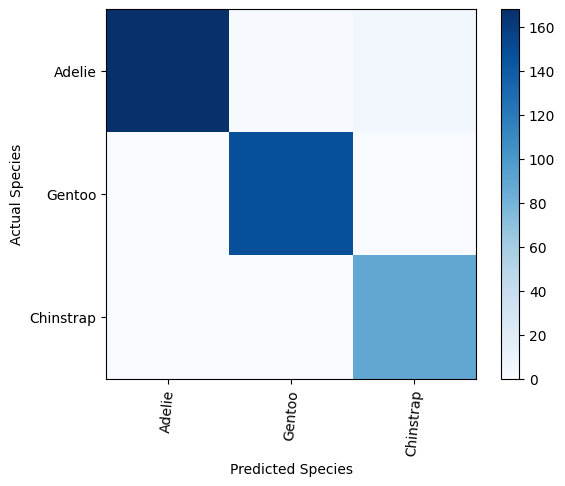

In [24]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=85)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

The confusion matrix should show a strong diagonal line indicating that there are more correct than incorrect predictions for each class.

## Save the trained model
Now that we have a model we believe is reasonably accurate, we can save its trained weights for use later.

混同行列は、各クラスで不正確な予測よりも正しい予測の方が多いことを示す強い対角線を示すはずです。

## 学習済みモデルを保存する
ある程度正確だと思われるモデルができたので、その学習済み重みを保存して後で使用することができます。

In [25]:
# Save the trained model
modelFileName = 'models/penguin-classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/penguin-classifier.h5


## Use the trained model

When we have a new penguin observation, we can use the model to predict the species.

## 学習済みモデルを使う

新しいペンギンの観察ができたときには、このモデルを使って種を予測することができます。

In [26]:
# Load the saved model
model = models.load_model(modelFileName)

# CReate a new array of features
x_new = np.array([[50.4,15.3,20,50]])
print ('New sample: {}'.format(x_new))

# Use the model to predict the class
class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(penguin_classes[predictions[0]])

New sample: [[50.4 15.3 20.  50. ]]
1/1 [==============================] - 0s 60ms/step
Gentoo


## Learn more

This notebook was designed to help you understand the basic concepts and principles involved in deep neural networks, using a simple Tensorflow example. To learn more about Tensorflow, take a look at the <a href="https://www.tensorflow.org/" target="_blank">Tensorflow web site</a>.